# Integración numérica

El método mas simple para aproximar una integral es sumar el área de los rectángulos que estan definidos en cada subintervalo.

En ancho de cada rectángulo es $h=x_{j+1}-x_{j}$, y la altura está definida por el valor que tome $f(x)$ en algún punto del subintervalo. La elección obvia seria tomar la altura la función evaluada en un punto extremo del subintervalo, es decir: $f(x_j)$ o $f(x_{j+1})$ 

<img src = "left_integral.jpg"  width="500" height="300"/>

De esta manera podermos expresar la integral como la suma de Riemman:

$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h f(x_j)$

o como:

$\int_a^b f(x) dx \approx \sum_{i=1}^{n} h f(x_{j+1})$

dependiendo si se eleige el extremo izquierdo o derecho de cada subintervalo de la partición.

De igual manera que para derivación numérica queremos evaluar cual es la precisión conforme $h$ disminuye. para ello podemos tomar la expansion de Taylor alrededor de $x_j = a$, es decir:

$
f(x)=f(x_j)+f^{\prime}(x_j)(x-x_j)+f^{\prime\prime}(x_j)\dfrac{(x-x_j)^2}{2!}+\cdots
$

integrando ambos lados en un subintervalo de la partición $[x_j,x_{j+1}]\in[a,b]$:

$\int_{x_j}^{x_{j+1}}f(x)dx=\int_{x_j}^{x_{j+1}}(f(x_j)+f^{\prime}(x_j)(x-x_j)+\cdots) dx $

distribuyendo la integral y considerando que $f(x_j), f^{\prime}(x_j),...$ son constantes, se tiene

$\int_{x_j}^{x_{j+1}}f(x)dx=hf(x_j)+f^{\prime}(x_j)\frac{h^2}{2}+f^{\prime\prime}(x_j)\frac{h^3}{3}+\cdots $

Si tomamos la aproximación hasta el segundo término se tiene

$\int_{x_j}^{x_{j+1}}f(x)dx=hf(x_j)+f^{\prime}(x_j)\frac{h^2}{2}+O(h^3) $

Si tomamos la aproxiamción hasta el primer término se tiene

$\int_{x_j}^{x_{j+1}}f(x)dx=hf(x_j)+O(h^2) $

el cual es un sumando de la suma de Riemman. Es importante considerar cual es el error de nuestra aproximación. Entoces, sumando el error $O(h^2)$ sobre la suma de Riemman completa obtenemos 

$nO(h^2)=\frac{b-a}{h}O(h^2)=O(h)$

$h=\dfrac{b-a}{n}$

## Aproximación del punto  medio

Ahora, la suma de Riemman se construye considerando $h$ y en valor $x_j$ sobre el cual se evalua la función. Por lo que tenemos diferentes aproximaciones, una de ella es la **regla del punto medio**.

La cual toma la altura del rectángulo en cada subintervalo sobre el punto medio entre $x_j$ y $x_{j+1}$, el cual denotaremos como $y_j=\frac{x_{j+1}+x_j}{2}$. Es decir:

$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h f(y_j)$

Realizando la expansion de Taylor para $f(x)$ alrededor de $y_j$ e integrando en un subintervalo tenemos:

$\int_{x_j}^{x_{j+1}}f(x)dx=\int_{x_j}^{x_{j+1}}(f(y_j)+f^{\prime}(y_j)(x-y_j)+\frac{f^{\prime\prime}(y_j)(x-y_j)^2}{2!}+\cdots ) dx $

distribuyendo la integral notamos que todos los sumandos con un término $(x-y_j)^p$ con $p$ impar son cero. Además que para $p$ par $\int_{x_j}^{x_{j+1}}(x-y_j)^p dx= \int_{-h/2}^{h/2} x^p dx$, lo cual resulta en un múltiplo de $h^{p+1}$. Por lo tanto:

$\int_{x_j}^{x_{j+1}}f(x) dx=hf(y_i)+O(h^3)$

analizando el error de manera similar a la aproximacion anterior se puede concluir que esta aproximacion sobre todo en intervalo $[a,b]$ es de segundo orden, $O(h^2)$

## Ejercicio 1

Considere la suma de Riemman izquierda y derecha, así como la regla del punto medio para aproximar $\int_0^{\pi} sin(x) dx$ con una partición de 10 subintervalos.

Para resolver este ejercicio utilizaremos la función **sum** de la librería **numpy**.

In [1]:
import numpy as np

In [2]:
?np.sum

**Parameters:**

arr : input array.

axis : axis along which we want to calculate the sum value. Otherwise, it will consider arr to be flattened(works on all the axis). axis = 0 means along the column and axis = 1 means working along the row.

In [3]:
array = [1,2,3,4,5]
np.sum(array)

15

In [4]:
array = [[1,2,3,4],[5,6,7,8],[1,2,3,4]]
np.sum(array)

46

In [5]:
array = [[1,2,3,4],
         [5,6,7,8],
         [1,2,3,4]]
np.sum(array, axis = 0)

array([ 7, 10, 13, 16])

Ahora si,regresando al ejercicio...

Considere la suma de Riemman izquierda y derecha, así como la regla del punto medio para aproximar $\int_0^{\pi} sin(x) dx$ con una partición de 10 subintervalos.

In [27]:
a = 0
b = np.pi
n = 11
h = (b-a)/(n-1)
x = np.linspace(a,b,n)
f = np.sin(x)
f

array([0.00000000e+00, 3.09016994e-01, 5.87785252e-01, 8.09016994e-01,
       9.51056516e-01, 1.00000000e+00, 9.51056516e-01, 8.09016994e-01,
       5.87785252e-01, 3.09016994e-01, 1.22464680e-16])

In [7]:
Riemman_L = h*np.sum(f[:n-1])
Riemman_R = h*np.sum(f[1:])
Mid = h*np.sum(np.sin((x[1:]+x[:n-1])/2))
Riemman_L,Riemman_R,Mid

(1.9835235375094546, 1.9835235375094546, 2.008248407907974)

Sabemos que calculando analíticamente la $\int_0^{\pi} sin(x) dx = 2$. Entonces el error de las diferentes aproximaciones es:

In [8]:
error_L = 2-Riemman_L
error_R = 2-Riemman_R
error_M = 2-Mid
error_L,error_R,error_M

(0.01647646249054535, 0.01647646249054535, -0.008248407907974098)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
f2 = 0*x

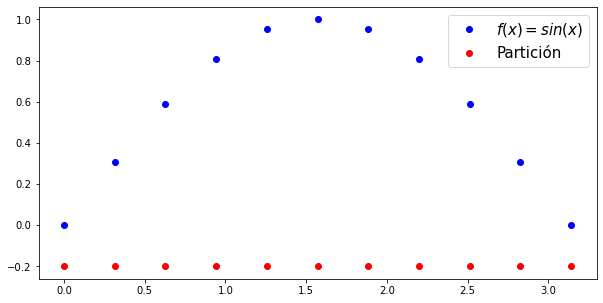

In [11]:
plt.figure(figsize = (10,5))
plt.plot(x,f,"bo", label = "$f(x)= sin(x)$")
plt.plot(x,f2-.2,"ro", label = "Partición")
plt.legend(fontsize=15)

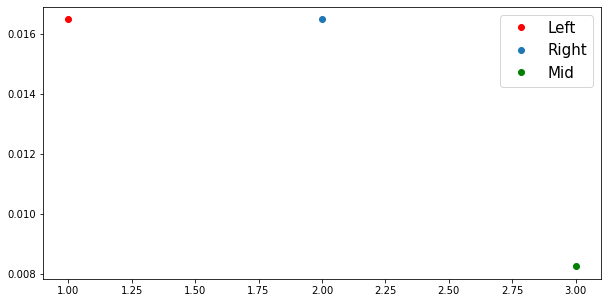

In [25]:
plt.figure(figsize = (10,5))
plt.plot(1,error_L,"ro", label = "Left")
plt.plot(2,error_R,"o",label = "Right")
plt.plot(3,abs(error_M),"go", label = "Mid")
plt.legend(fontsize=15)

## Aproximación del trapezoide

Esta aproximación ajusta un trapezoide en cada subintervalo y suma las áreas de cada trapezoide para aproximar la integral. En cada subintervalo se calcula el área del trapezoide fromado por los puntos $(x_j,0),(x_{j+1},0), (x_j,f(x_j))$ y $(x_{j+1},f(x_{j+1}))$. Es decir:

$\int_a^bf(x)dx \approx \sum_{=0}^{n-1}h\dfrac{f(x_j)+f(x_{j+1})}{2}$
    

<img src = "trapezoide.png"  width="400" height="300"/>

Podemos adecuar la expresión anterior para que sea mas eficiente el computo de la siguiente manera:

$\int_a^bf(x)dx \approx \dfrac{h}{2}\left(f(x_0)+2\sum_{i=1}^{n-1}f(x_j)+f(x_n)\right) $

y la aproximación es de segundo orden $O(h^2)$

## Cont Ejercicio 1

Considere la aproximación del trapecio para aproximar la $\int_0^{\pi} sin(x) dx$ con una partición de 10 subintervalos.

In [30]:
trap = (h/2)*(f[0]+2*np.sum(f[1:n-1])+f[n-1])
error_trap = 2-trap

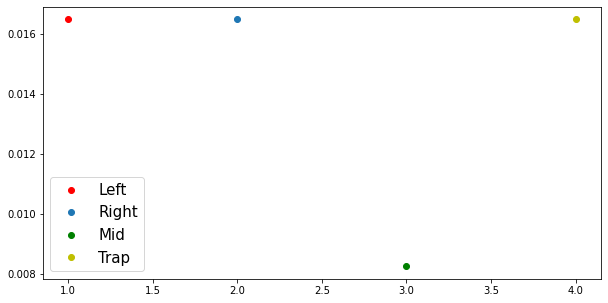

In [31]:
plt.figure(figsize = (10,5))
plt.plot(1,error_L,"ro", label = "Left")
plt.plot(2,error_R,"o",label = "Right")
plt.plot(3,abs(error_M),"go", label = "Mid")
plt.plot(4,error_trap,"yo", label="Trap")
plt.legend(fontsize=15)

## Aproximación de Simpson

Consideremos dos subintervalos consecutivos $[x_{i-1},x_{i}]$ y $[x_{i},x_{i+1}]$. El área bajo $f(x)$ en estos dos subintervalos se aproxima ajustando un polinomio cuadrático que pase porlos puntos $(x_{i-1},f(x_{i-1})),(x_{i},f(x_{i}))$ y $(x_{i+1},f(x_{i+1}))$, el cual es un polinomio único y se integra.

<img src = "simpson.png"  width="600" height="300"/>

Para generar el polinomio cudrático que ajusta a los puntos $(x_{i-1},f(x_{i-1})),(x_{i},f(x_{i}))$ y $(x_{i+1},f(x_{i+1}))$ se consideran los polinomios de Lagrange $L(x)$, cuya ecuación generadora es:

$L(x)=\sum_{i=1}^{n}y_{i}P_i(x)$

donde $n$ es el número de puntos, $y_i$ la coordenada $y$ del i-ésimo punto y $P_i$ se conoce como la base generadora dada por:

$
P_i(x)=\prod_{j=1,j\neq i}^{n}\dfrac{x-x_j}{x_i-x_j}
$

entonces para este caso tenemos que:

$
\begin{array}{ccl}
L_{k}(x)&=&f(x_{i-1})\dfrac{(x-x_i)(x-x_{i+1})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1})}+f(x_i)\dfrac{(x-x_{i-1})(x-x_{i+1})}{(x_{i}-x_{i-1})(x_{i}-x_{i+1})}\\&&+f(x_{i+1})\dfrac{(x-x_{i-1})(x-x_{i})}{(x_{i+1}-x_{i-1})(x_{i+1}-x_{i})}
\end{array}$

susituyendo $h$ queda

$
\begin{array}{ccl}
L_{k}&=& f(x_{i-1})\dfrac{(x-x_i)(x-x_{i+1})}{2h^2}+f(x_i)\dfrac{(x-x_{i-1})(x-x_{i+1})}{h^2}\\&&+f(x_{i+1})\dfrac{(x-x_{i-1})(x-x_{i})}{2h^2}
\end{array}$

Entonces la integral sobre el polinomio $L_k$

$
\int_{x_{i-1}}^{x_{i+1}}L_k (x) dx= \dfrac{h}{3}(f(x_{i-1})+4f(x_i)+f(x_{i+1}))
$

y la integral total sobre todo el intervalo $[a,b]$ es la suma de las integrales sobre todos los pares de intervalos. La cual resulta ser:

$
\int_a^bf(x)dx\approx \dfrac{h}{3}\left[f(x_0)+4\sum_{i=1,i\, impar}^{n-1} f(x_i)+2\sum_{i=2,i\, par}^{n-2} f(x_i)+f(x_n)\right]
$

La precisión de la aproximación de Simpson sobre todo el intervalo $[a,b]$ es $O(h^4)$

**Ejemplo:**

Encuentra los polinomios de Lagrange para los puntos $(0,1)$, $(1,3)$ y $(2,2)$

$
P_i(x)=\prod_{j=1,j\neq i}^{n}\dfrac{x-x_j}{x_i-x_j}
$

$n =3$

$j=1,2,3$

$i=1,2,3$

Para nuestro primer polinomio si $i=1$ entonces $j = 2,3$

Considerando la base generadora tenemos que:

$
\begin{array}{cccccc}
P_1(x)&=&\dfrac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}&=&\dfrac{(x-1)(x-2)}{(0-1)(0-2)} &=& \dfrac{1}{2}(x^2-3x+2)\\
P_2(x)&=&\dfrac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)}&=&\dfrac{(x-0)(x-2)}{(1-0)(1-2)} &=& -(x^2+2x)\\
P_3(x)&=&\dfrac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)}&=&\dfrac{(x-0)(x-1)}{(2-0)(2-1)} &=& \dfrac{1}{2}(x^2-x)
\end{array}
$

entonces

$
\begin{array}{ccl}
L(x)&=&(y_1)P_1+(y_2)P_2+(y_3)P_3\\
&=&(1)P_1+(3)P_2+(2)P_3\\
&=&-\dfrac{3}{2}x^2+\dfrac{7}{2}x+1
\end{array}
$

In [34]:
x = np.linspace(-2,4,30)
Pol = (-3/2)*x**2+(7/2)*x+1

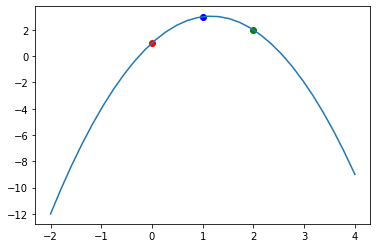

In [36]:
plt.plot(0,1,"ro")
plt.plot(1,3,"bo")
plt.plot(2,2,"go")
plt.plot(x,Pol)

Usando el método de simpson aproxime $\int_0^{\pi} sin(x) dx$

In [37]:
a = 0
b = np.pi
n = 11
h = (b-a)/(n-1)
x = np.linspace(a,b,n)
f = np.sin(x)

$
\int_a^bf(x)dx\approx \dfrac{h}{3}\left[f(x_0)+4\sum_{i=1,i\, impar}^{n-1} f(x_i)+2\sum_{i=2,i\, par}^{n-2} f(x_i)+f(x_n)\right]
$

In [41]:
Simp = (h/3)*(f[0]+4*np.sum(f[1:n-1:2])+2*np.sum(f[:n-2:2])+f[n-1])
Simp
error_Simp =2 -Simp

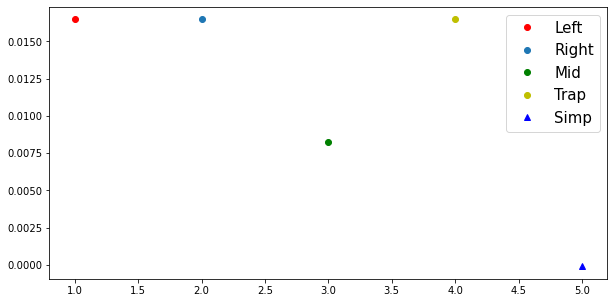

In [42]:
plt.figure(figsize = (10,5))
plt.plot(1,error_L,"ro", label = "Left")
plt.plot(2,error_R,"o",label = "Right")
plt.plot(3,abs(error_M),"go", label = "Mid")
plt.plot(4,error_trap,"yo", label="Trap")
plt.plot(5,error_Simp,"b^", label="Simp")
plt.legend(fontsize=15)